In [1]:
# Project Name: Machine Learning Predictive Analysis of Warsaw Housing Rental Prices
# Authors: Hanwen Miao (ID: 436819), Yue Zhou (ID: 437844)

In [11]:
import pandas as pd

# Load the dataset
file_path = r'D:\houserent.csv'
df = pd.read_csv(file_path, encoding='GBK')  # Specifying encoding as GBK

# Display the first few rows of the dataframe to understand its structure
df.head()

,area,room_num,floor,total_floor,year_built,dish_washer,fridge,furniture,oven,stove,...,district_ Warszawa,district_ Wawer,district_ Wesola,district_ Wilanow,district_ Wola,district_ Wlochy,district_ mazowieckie,district_ srodmiecie,district_ zoliborz,gross_price
0,37,2,1.0,4.000000,2001.453488,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,2435.244186
1,38,2,1.0,5.802326,2020.000000,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,2175.000000
2,57,3,1.0,15.000000,1984.000000,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,3300.000000
3,63,2,4.0,5.000000,2005.000000,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,2585.046512
4,65,3,3.0,4.000000,1938.000000,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,3424.918605


In [2]:
# Preliminary Data Preprocessing

# Checking for missing values
missing_values = df.isnull().sum()

# Checking for data types
data_types = df.dtypes

# Descriptive statistics
descriptive_stats = df.describe()

missing_values, data_types, descriptive_stats
#The results show that there are no missing values in the data set and most of the data is numeric



(area                              0
 room_num                          0
 floor                             0
 total_floor                       0
 year_built                        0
 dish_washer                       0
 fridge                            0
 furniture                         0
 oven                              0
 stove                             0
 tv_set                            0
 washer                            0
 balcony                           0
 basement                          0
 garage/parking_space              0
 alarm system                      0
 elevator                          0
 separate kitchen                  0
 internet                          0
 air conditioning                  0
 garden                            0
 build_type_Apartment_high         0
 build_type_Apartment_medium_q)    0
 build_type_Loft                   0
 build_type_Private_house          0
 build_type_Private_house.1        0
 status_notready                   0
 

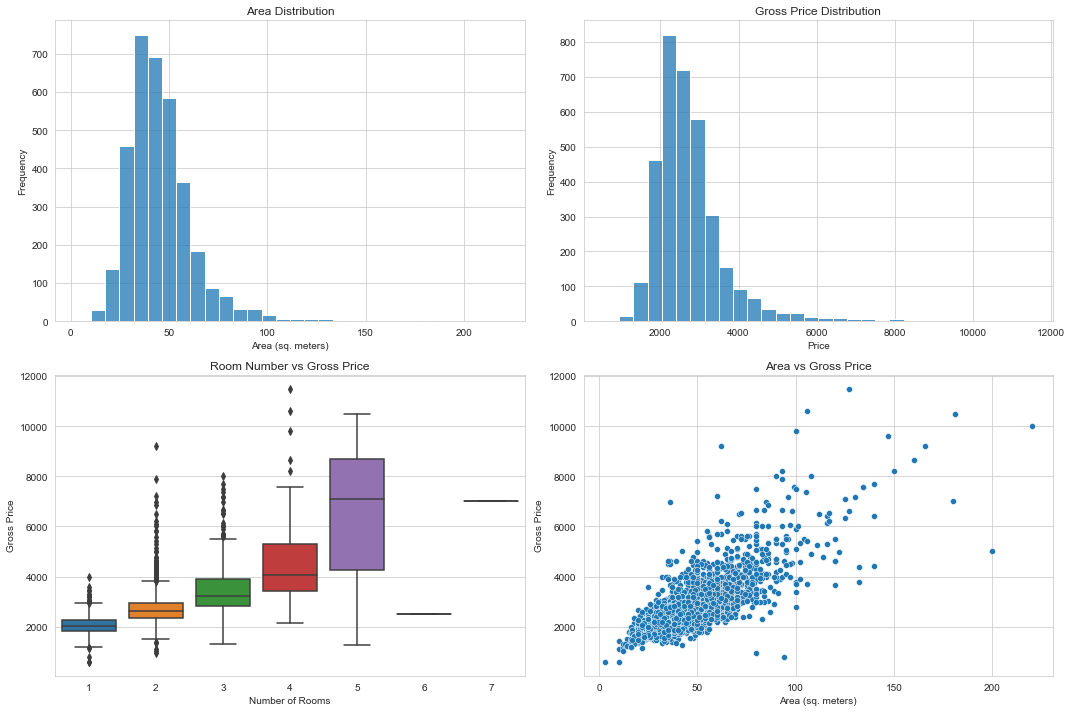

In [12]:
#EDA stage
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color of the plots
sns.set_style("whitegrid")

# Creating a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Histogram for Room Area
sns.histplot(df['area'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Area Distribution')
axes[0, 0].set_xlabel('Area (sq. meters)')
axes[0, 0].set_ylabel('Frequency')

# Histogram for Gross Price
sns.histplot(df['gross_price'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Gross Price Distribution')
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('Frequency')

# Boxplot for Room Number vs Gross Price
sns.boxplot(x='room_num', y='gross_price', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Room Number vs Gross Price')
axes[1, 0].set_xlabel('Number of Rooms')
axes[1, 0].set_ylabel('Gross Price')

# Scatterplot for Area vs Gross Price
sns.scatterplot(x='area', y='gross_price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Area vs Gross Price')
axes[1, 1].set_xlabel('Area (sq. meters)')
axes[1, 1].set_ylabel('Gross Price')

plt.tight_layout()
plt.show()


In [13]:
# Correlation Analysis
correlation = df.corr()

# Focusing on the correlation with gross price
correlation_gross_price = correlation['gross_price'].sort_values(ascending=False)

correlation_gross_price



gross_price                       1.000000
area                              0.767540
room_num                          0.618378
dish_washer                       0.370647
build_type_Apartment_high         0.279072
oven                              0.203732
air conditioning                  0.197305
tv_set                            0.161406
balcony                           0.157726
elevator                          0.136726
district_ Wilanow                 0.115601
build_type_Loft                   0.098313
district_ srodmiecie              0.088702
alarm system                      0.087043
internet                          0.068406
district_ Mokotwska               0.060642
district_ Centrum                 0.055676
floor                             0.054987
garden                            0.053479
total_floor                       0.046621
district_ zoliborz                0.045941
status_Ready                      0.038446
district_ Wola                    0.030852
status_notr

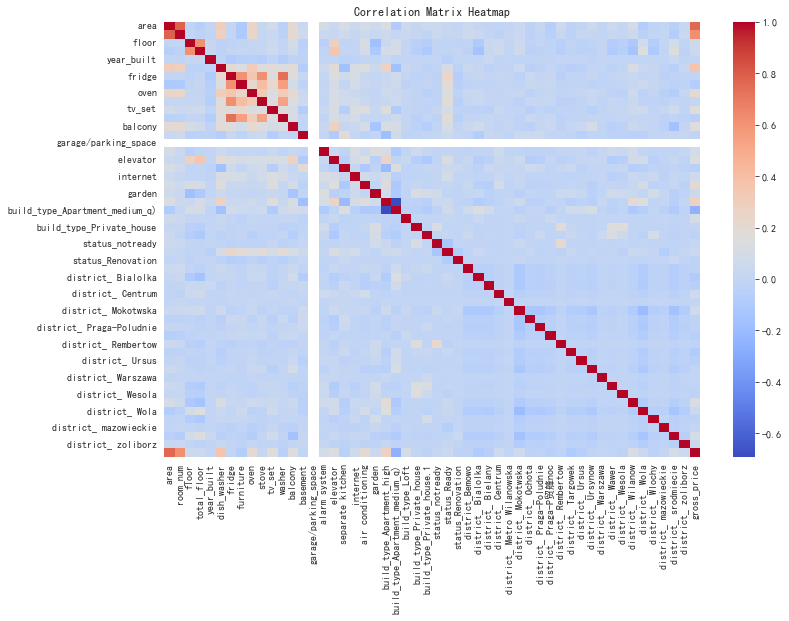

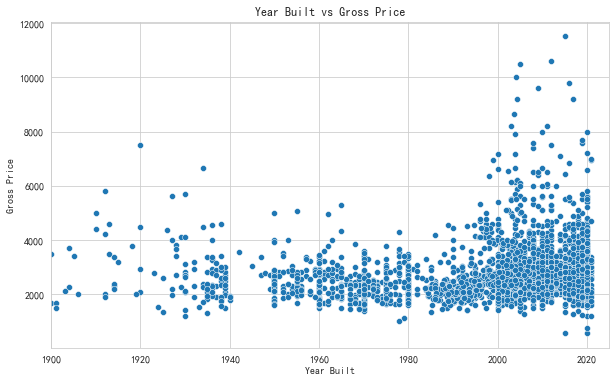

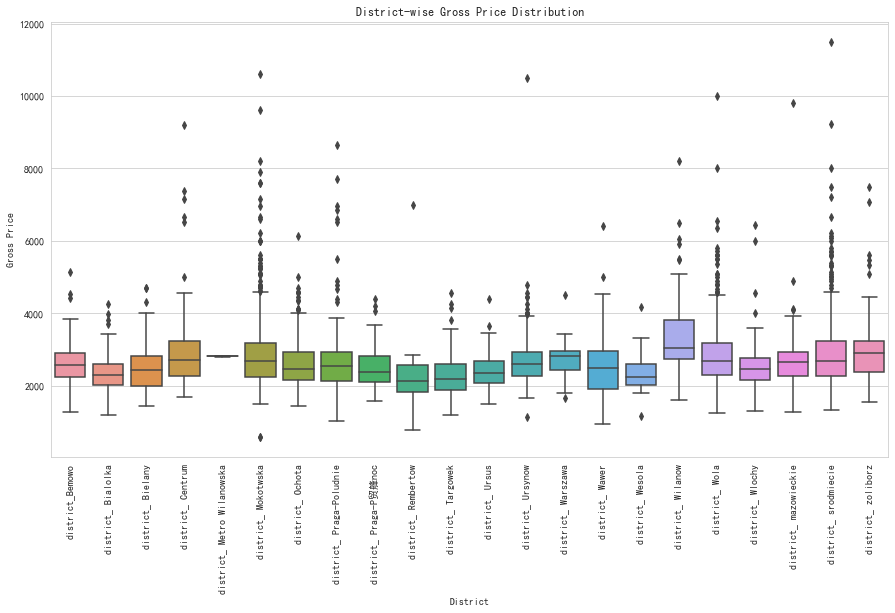

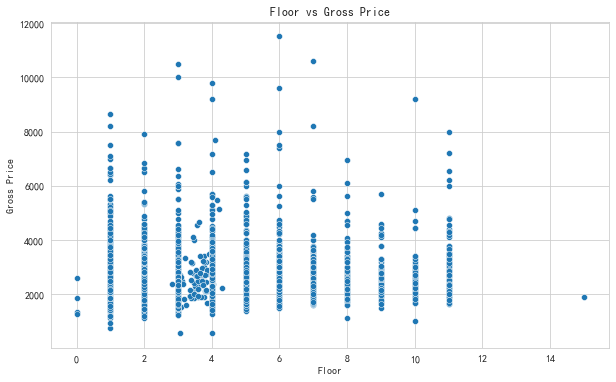

In [5]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.rcParams['font.sans-serif'] = ['SimHei']  # Setting a font for display
plt.rcParams['axes.unicode_minus'] = False  # Normal display of the minus sign

# Visualization of Correlation with Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Analyzing and Visualizing Year Built vs Gross Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year_built', y='gross_price', data=df)
plt.title('Year Built vs Gross Price')
plt.xlabel('Year Built')
plt.xlim(1900,2025)
plt.ylabel('Gross Price')
plt.show()

# District-wise Price Distribution
# Extracting district columns
district_cols = [col for col in df.columns if 'district_' in col]
df_districts = df[district_cols + ['gross_price']]
df_districts = df_districts.melt(id_vars=['gross_price'], var_name='district', value_name='presence')
df_districts = df_districts[df_districts['presence'] == 1]

plt.figure(figsize=(15, 8))
sns.boxplot(x='district', y='gross_price', data=df_districts)
plt.xticks(rotation=90)
plt.title('District-wise Gross Price Distribution')
plt.xlabel('District')
plt.ylabel('Gross Price')
plt.show()

# The corrleation between floor and gross rent price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='floor', y='gross_price', data=df)
plt.title('Floor vs Gross Price')
plt.xlabel('Floor')
plt.ylabel('Gross Price')
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preparing the data
X = df.drop('gross_price', axis=1)
y = df['gross_price']

# Splitting the data into training and testing sets, test set: 30%, random seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize AdaBoostRegressor
ada_regressor = AdaBoostRegressor(random_state=42)

# Define the range of values for n_estimators to search
param_grid = {'n_estimators': [50, 100, 150, 200]}  

# Initialize GridSearchCV
grid_search = GridSearchCV(ada_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Initialize AdaBoostRegressor with the best parameters
ada_regressor = AdaBoostRegressor(n_estimators=best_params['n_estimators'], random_state=42)

# Train the model with the best parameters
ada_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred =ada_regressor.predict(X_test)

# Calculate the evaluation metrics with the best model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

best_params, mse, mae, r2

({'n_estimators': 50},
 403476.0772305412,
 505.4540763489867,
 0.5769939913104261)

In [7]:
from sklearn.neural_network import MLPRegressor

# Initialize MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Training the MLP Regressor
mlp_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred_mlp = mlp_regressor.predict(X_test)

# Calculating the evaluation metrics for MLP Regressor
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

mse_mlp, mae_mlp, r2_mlp



(387930.3729716864, 421.30920852368877, 0.5932921727439917)

In [8]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression
linear_regressor = LinearRegression()

# Training the Linear Regression model
linear_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred_linear = linear_regressor.predict(X_test)

# Calculating the evaluation metrics for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_linear, mae_linear, r2_linear



(289881.97438202205, 362.97789479795216, 0.696086524345958)

In [9]:
from xgboost import XGBRegressor

# Initialize XGBRegressor
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)

# Define the range of values for n_estimators to search
param_grid = {'n_estimators': [50, 100, 150, 200]}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_

# Initialize XGBRegressor with the best parameters
xgb_regressor_best = XGBRegressor(n_estimators=best_params_xgb['n_estimators'], random_state=42)

# Training the model with the best parameters
xgb_regressor_best.fit(X_train, y_train)

# Predicting on the test set
y_pred_xgb = xgb_regressor_best.predict(X_test)


# Calculating the evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

best_params_xgb,mse_xgb, mae_xgb, r2_xgb



({'n_estimators': 50},
 230051.71140340948,
 321.2138773104524,
 0.7588128225571144)

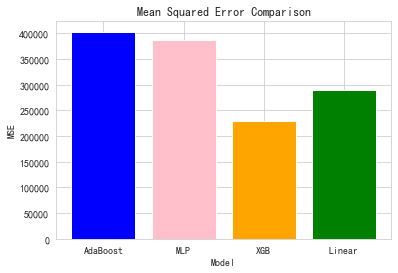

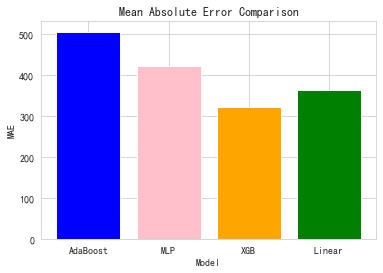

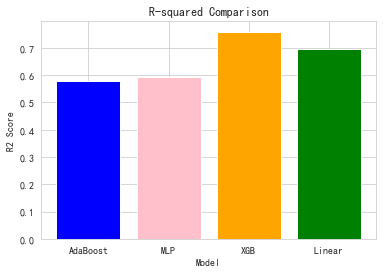

In [10]:
import matplotlib.pyplot as plt

# Updating the lists to include Linear Regression
models_updated = ['AdaBoost', 'MLP', 'XGB', 'Linear']
mse_values_updated = [mse, mse_mlp, mse_xgb, mse_linear]
mae_values_updated = [mae, mae_mlp, mae_xgb, mae_linear]
r2_values_updated = [r2, r2_mlp, r2_xgb, r2_linear]

# Mean Squared Error (MSE) Comparison
plt.figure(figsize=(6, 4))
plt.bar(models_updated, mse_values_updated, color=['blue', 'pink', 'orange', 'green'])
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.show()

# Mean Absolute Error (MAE) Comparison
plt.figure(figsize=(6, 4))
plt.bar(models_updated, mae_values_updated, color=['blue', 'pink', 'orange', 'green'])
plt.title('Mean Absolute Error Comparison')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.show()

# R-squared (R2) Comparison
plt.figure(figsize=(6, 4))
plt.bar(models_updated, r2_values_updated, color=['blue', 'pink', 'orange', 'green'])
plt.title('R-squared Comparison')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.show()



In [ ]:
# We declare that we didn't copy any code from the internet or third parties.Everything is done by ourselves.